# Step 1:
* Make Necessary Imports 


In [1]:
try:
    import pandas as pd 
    import os 
    import sys
    import seaborn as sns
    import numpy as np
    from wordcloud import WordCloud, STOPWORDS 
    import matplotlib.pyplot as plt 
    %matplotlib inline 
    
    print("All Modules are Loaded ...  ")
    
except Exception as e:
    
    print("Some Modules are missing {}".format(e))

All Modules are Loaded ...  


In [2]:
for x in os.listdir():
    print(x)

.anaconda
.android
.AndroidStudio3.4
.appletviewer
.astropy
.atom
.conda
.condarc
.config
.dbus-keyrings
.eclipse
.emulator_console_auth_token
.gradle
.IdeaIC2019.2
.idlerc
.ipynb_checkpoints
.ipython
.jssc
.junique
.jupyter
.liclipse
.lmmsrc.xml
.m2
.matplotlib
.nbi
.octave_hist
.p2
.PyCharm2018.3
.PyCharmCE2018.2
.PyCharmCE2018.3
.spyder-py3
.thumbnails
.tooling
3D Objects
Anaconda3
Analysis.ipynb
AndroidStudioProjects
AppData
Application Data
births.csv
bluej
Contacts
Cookies
Desktop
Documents
Downloads
Dropbox
eclipse
eclipse-kalu
eclipse-workspace
Favorites
FremontBridge.csv
Google Drive
HP
IntelGraphicsProfiles
KaluPython2ndWorkBook.ipynb
KaluPythonMAchineLearning.ipynb
KaluPythonWorkBook.ipynb
Links
lmms
Local Settings
MicrosoftEdgeBackups
Mine-imator
Music
My Documents
myPlot.png
my_figure.png
NetHood
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TM.blf
NTUSER.DAT{fd9a35db-49fe-11e9-aa2c-248a07783950}.TMContainer00000000000000000001

# Step 2:
* know you dataset well 

In [3]:
df = pd.read_csv("C:/Users/kalusiva/Google Drive/BITS/Sem2/MachineLearning/Copy of 1429_1.csv")
df.head(2)

C:\Users\kalusiva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [9]:
df['reviews.rating'].count()
df.groupby(['reviews.doRecommend','reviews.rating']).count()[['id']]

ax = df[‘truth’].value_counts(sort=False).plot(kind=’barh’)
ax.set_xlabel(“Number of Samples in training Set”)
ax.set_ylabel(“Label”)

id
reviews.doRecommend reviews.rating       
False               1.0               331
                    2.0               324
                    3.0               532
                    4.0               134
                    5.0                63
True                1.0                25
                    2.0                58
                    3.0               938
                    4.0              8335
                    5.0             23326

In [33]:
df['len'] = df['reviews.text'].str.len()  # Store string length of each sample
df = df.sort_values(['len'], ascending=True)
df[['reviews.doRecommend','reviews.rating','reviews.text' ] ].head(400)
df.dropna(subset=['reviews.doRecommend'])[['reviews.doRecommend','reviews.rating','reviews.text' ] ].head(40)

,reviews.doRecommend,reviews.rating,reviews.text
6724,True,5.0,#NAME?
28578,True,5.0,I'm in LOVE with ALEXA!!
21953,True,5.0,I like it. I use mostly for music.
17510,True,5.0,I just love my new Kindle paperwhite.
23029,True,5.0,SuperFun to use.easy set up and great product.
15811,True,5.0,Good for toddlersEasy to carryEasy to download
31670,True,5.0,Bought to listen to Pandora and MLB.tv. Awesome!
10333,True,5.0,Perfect first kindle easy to useeasy for kids!!!
25752,True,4.0,Pretty easy to set up. It's fun and entertaining
16580,True,5.0,My 2yr old daughter loves it! Perfect Xmas gift!


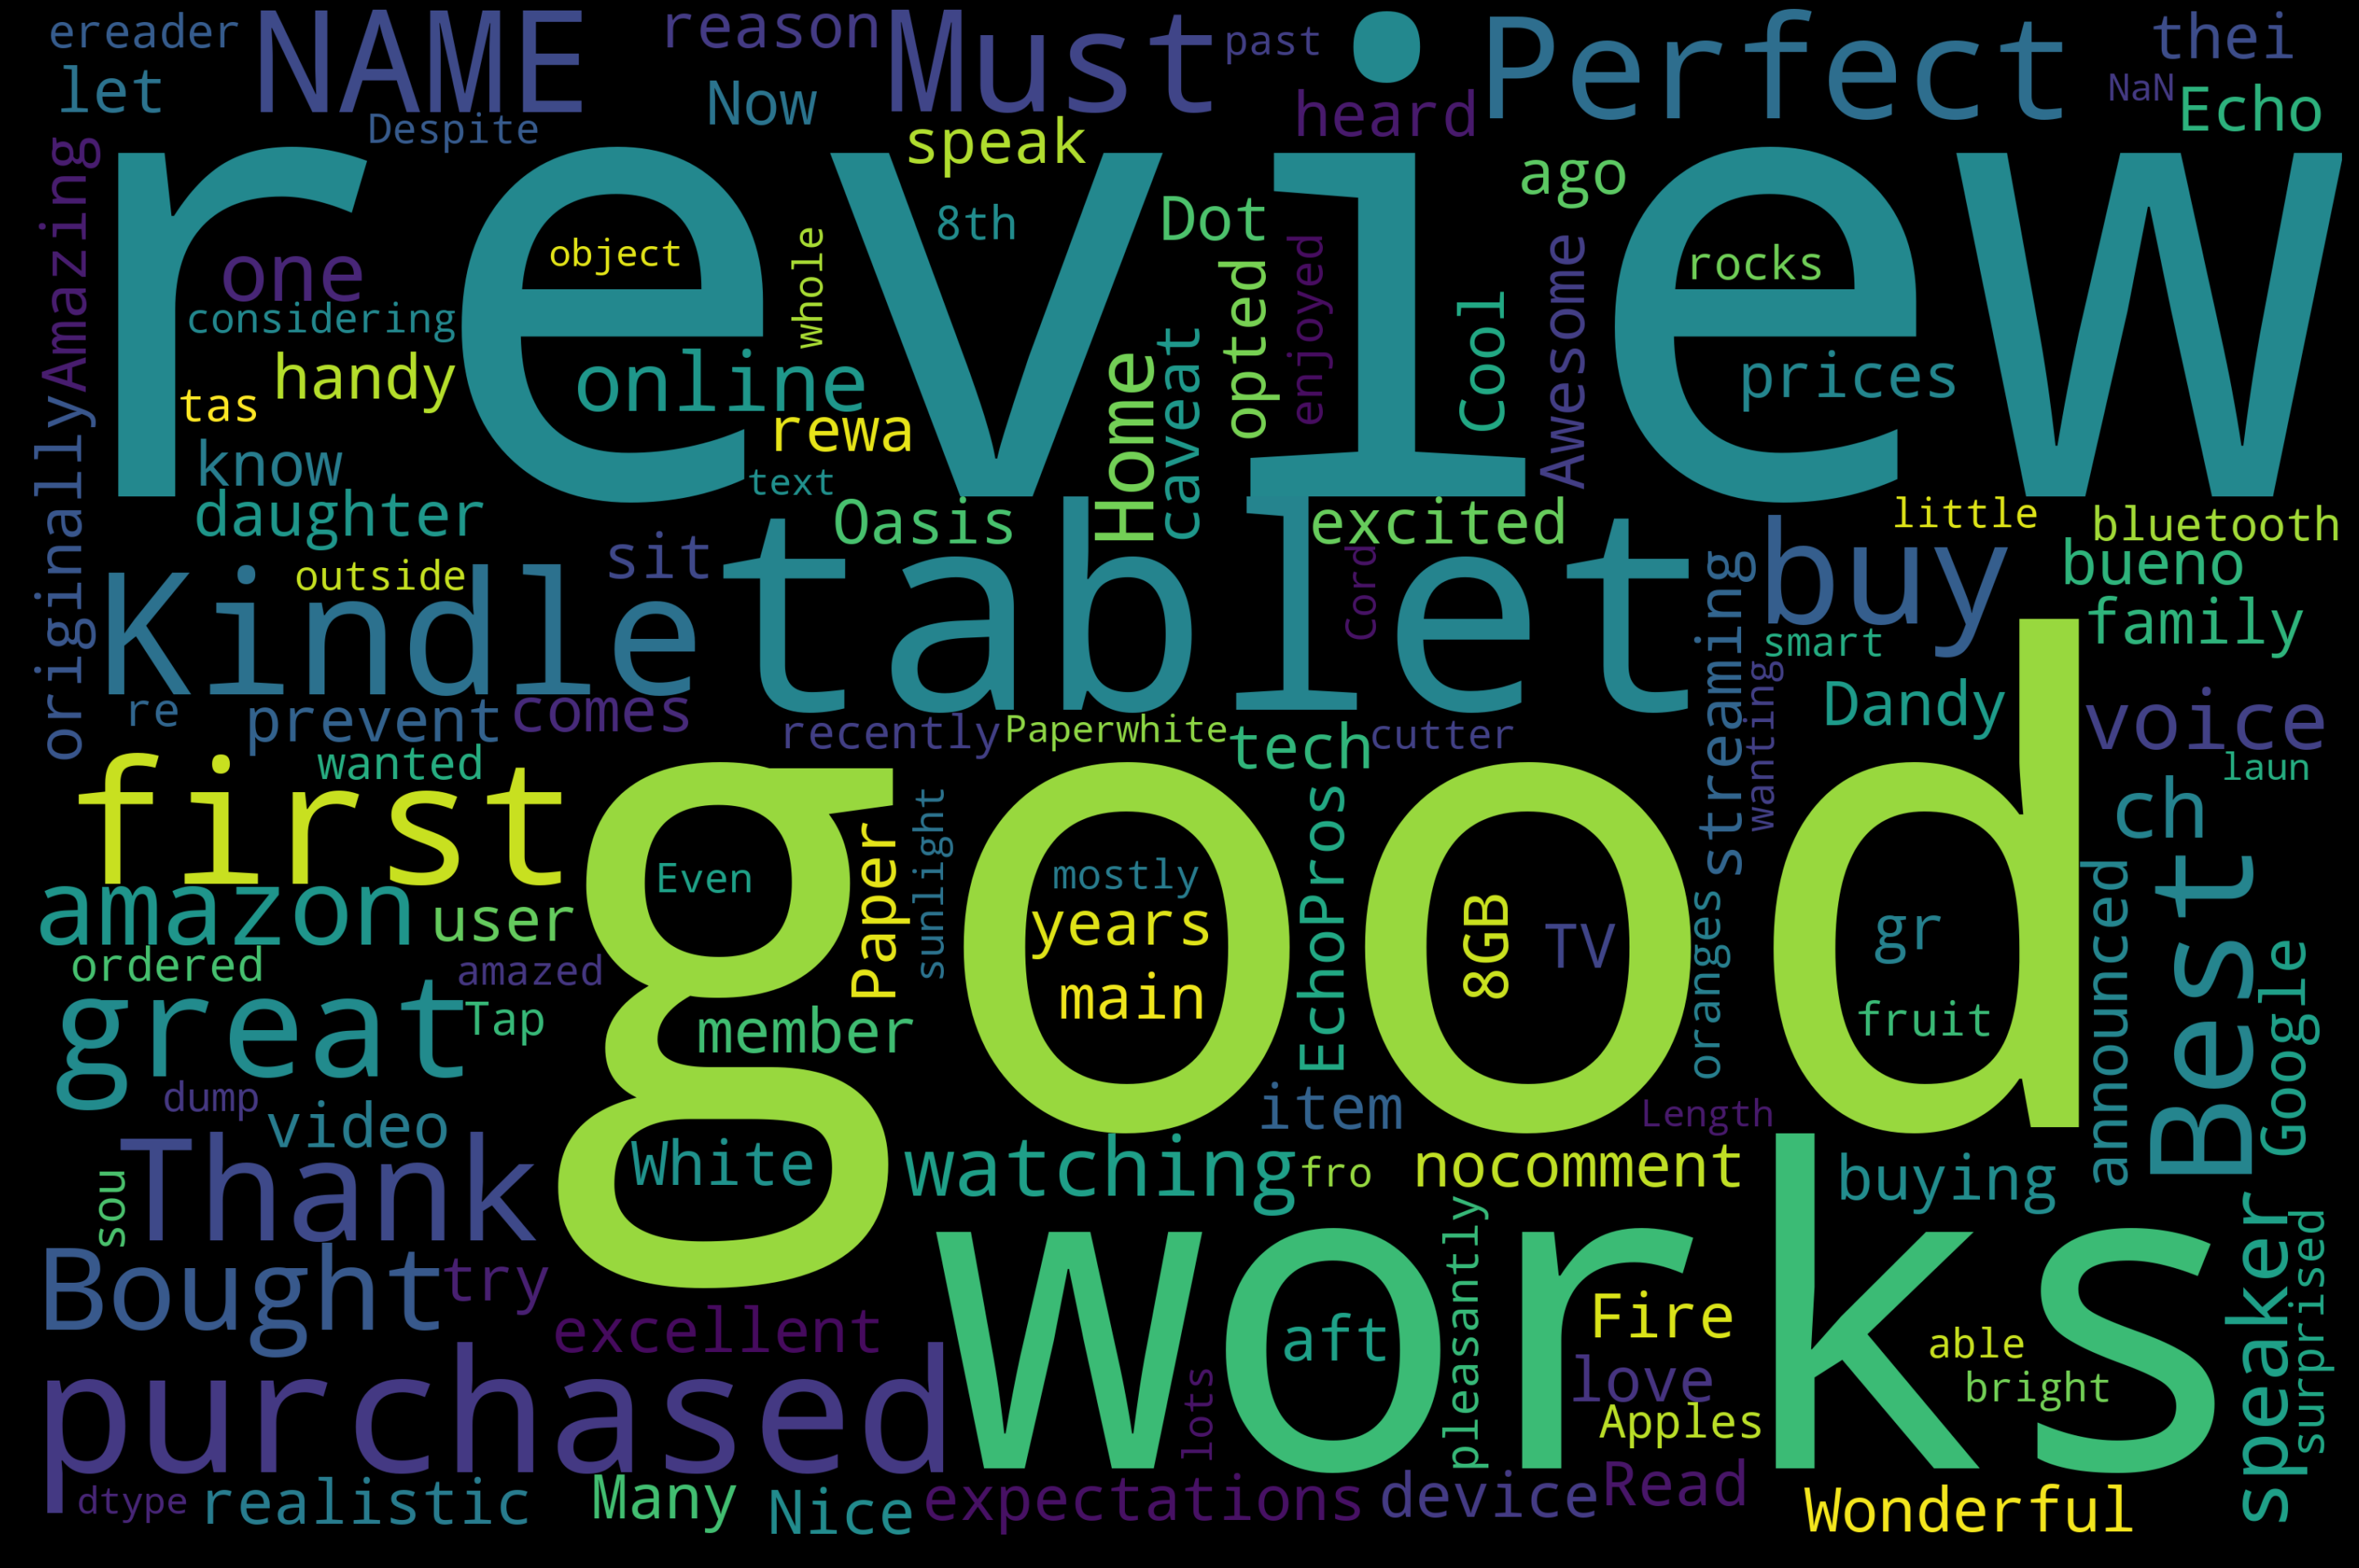

In [23]:

text = df["reviews.text"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
def score(text: str) -> float:
        # pip install textblob
        from textblob import TextBlob
        return TextBlob(text).sentiment.polarity

In [48]:
#df['score'] = df['reviews.text'].apply(score)

df['score'] = df['reviews.text'].apply(lambda x: score(str(x)) if x != None else x)

# Convert float score to category based on binning


In [49]:
df['pred'] = pd.cut(df['score'],bins=5,labels=[1, 2, 3, 4, 5])

In [64]:
from sklearn.metrics import f1_score, accuracy_score

def accuracy( df: pd.DataFrame) -> None:
        "Prediction accuracy (percentage) and F1 score"
        
        acc = accuracy_score(df['reviews.rating'], df['pred'])*100
        f1 = f1_score(df['reviews.rating'], df['pred'], average='macro')
        print("Accuracy: {}\nMacro F1-score: {}".format(acc, f1))

In [71]:
#df [['id','reviews.rating','reviews.doRecommend','score','pred','reviews.text']].head(200)

dfnew = df[df['reviews.rating'].notnull()]
dfnew[['reviews.rating','pred']].head(20)


,reviews.rating,pred
3124,2.0,3
3428,5.0,4
3078,5.0,5
3314,5.0,4
3080,5.0,4
3436,4.0,5
3320,5.0,3
3154,5.0,5
3411,5.0,4
3471,5.0,3


In [72]:
accuracy(dfnew)

Accuracy: 29.8495393767869
Macro F1-score: 0.18278085956489246


In [73]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


def plot_confusion_matrix(y_true, y_pred, 
                          classes=[1, 2, 3, 4, 5],
                          normalize=False,
                          cmap=plt.cm.YlOrBr):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    (Adapted from scikit-learn docs).
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', origin='lower', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # Show all ticks
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # Label with respective list entries
           xticklabels=classes, yticklabels=classes,
           ylabel='True label',
           xlabel='Predicted label')

    # Set alignment of tick labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    return fig, ax

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a5ec63d668>)

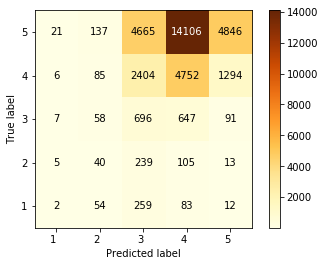

In [74]:
plot_confusion_matrix(dfnew['reviews.rating'],dfnew['pred'])




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

In [26]:
df.isna().count()

id                      34660
name                    34660
asins                   34660
brand                   34660
categories              34660
keys                    34660
manufacturer            34660
reviews.date            34660
reviews.dateAdded       34660
reviews.dateSeen        34660
reviews.didPurchase     34660
reviews.doRecommend     34660
reviews.id              34660
reviews.numHelpful      34660
reviews.rating          34660
reviews.sourceURLs      34660
reviews.text            34660
reviews.title           34660
reviews.userCity        34660
reviews.userProvince    34660
reviews.username        34660
dtype: int64

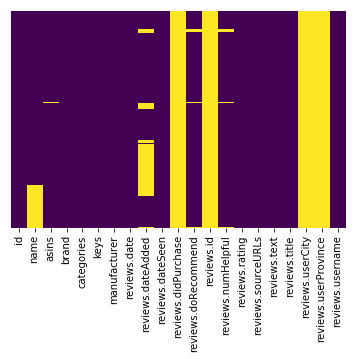

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

* This shows that columns Prices have some Null or missing Values 

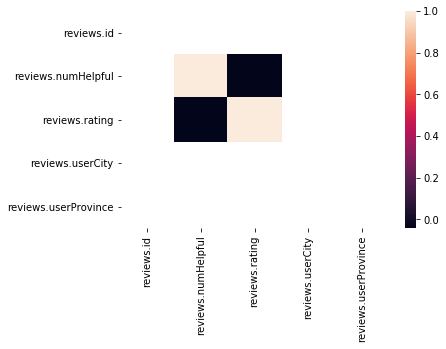

In [28]:
sns.heatmap(df.corr())

ValueError: color kwarg must have one color per data set. 34660 data sets and 1 colors were provided

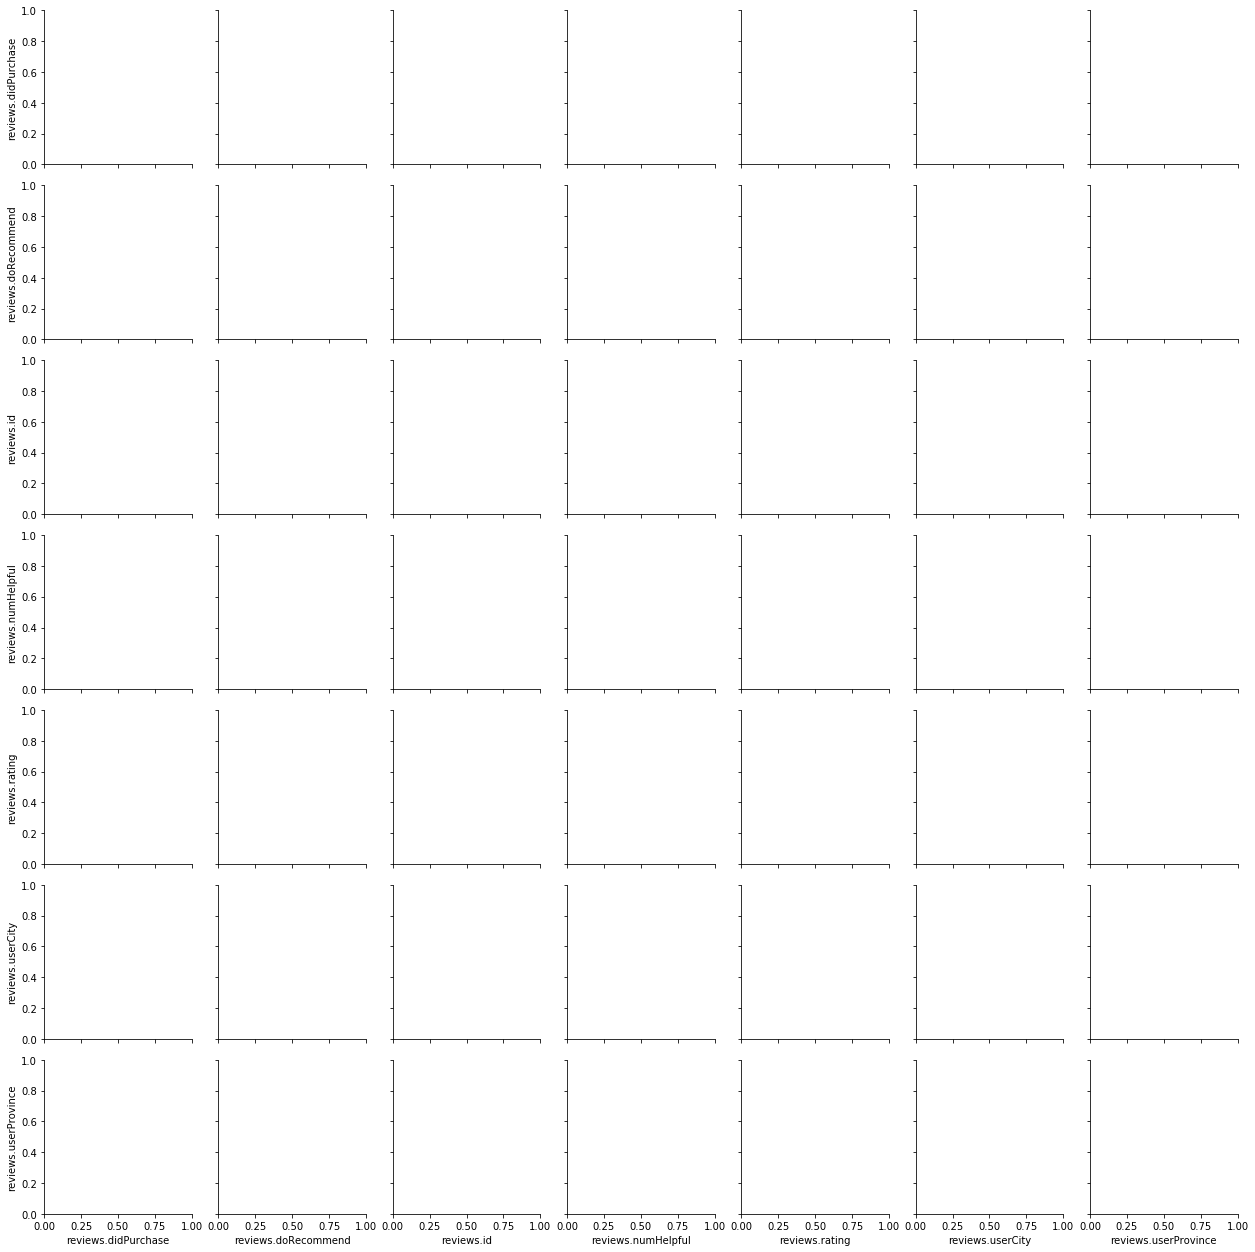

In [29]:
sns.pairplot(df)

# Step 2:
* Answering the Questions 

###### Q) How many Brands are there ?

In [30]:
print(df["brand"].nunique())
df["brand"].unique()

6


array(['Amazon', 'Amazon Fire', 'Amazon Echo', 'Amazon Coco T',
       'Amazon Fire Tv', 'Amazon Digital Services Inc.'], dtype=object)

##### Q) How Many Brands of Mobile have Maximum ratings 

In [32]:
print(df["brand"][df["reviews.rating"] == df["reviews.rating"].max()].nunique())
print(print(df["brand"][df["reviews.rating"] == df["reviews.rating"].max()].unique()))

5
['Amazon' 'Amazon Fire' 'Amazon Echo' 'Amazon Fire Tv'
 'Amazon Digital Services Inc.']
None


##### Q) How many  brands has Mininum Ratings what are their names 

In [33]:
print(df["brand"][df["reviews.rating"] == df["reviews.rating"].min()].nunique())
print(print(df["brand"][df["reviews.rating"] == df["reviews.rating"].min()].unique()))

5
['Amazon' 'Amazon Fire' 'Amazon Echo' 'Amazon Fire Tv'
 'Amazon Digital Services Inc.']
None


#### Q) Which Brand has Maximum Number of reviews 

In [46]:
df[["brand", "prices"]][df["totalReviews"] == df["totalReviews"].max()]

,brand,prices
352,Google,$107.70


##### Q) Tell me which brand has maximum rating/review ratio 

In [34]:
df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/b01ahb9cn2",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,NaN,NaN,truman


In [47]:
df["rating/review"] = df["rating"]/df["totalReviews"]

In [48]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [54]:
df["brand"][df["rating/review"] == df["rating/review"].max()].unique()

array(['Samsung', 'Sony', 'Xiaomi', 'ASUS', 'Motorola', 'Google'],
      dtype=object)

### Tell me brand that has maximum numbers of reviews and how many ?

In [35]:
df1 = df.groupby(by='brand').count()

In [36]:
df1["totalReviews"].plot(kind='bar')

KeyError: 'totalReviews'

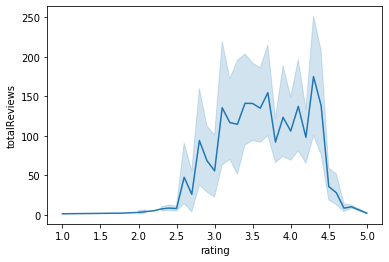

In [71]:
sns.lineplot(x=df["rating"], y=df["totalReviews"])

In [99]:
df.head(2)

,asin,brand,title,url,image,rating,reviewUrl,totalReviews,prices,rating/review
0,B0000SX2UC,Nokia,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14,NaN,0.214286
1,B0009N5L7K,Motorola,Motorola I265 phone,https://www.amazon.com/Motorola-i265-I265-phon...,https://m.media-amazon.com/images/I/419WBAVDAR...,2.9,https://www.amazon.com/product-reviews/B0009N5L7K,7,$49.95,0.414286


In [37]:
df1 = df.groupby(by='brand').mean()

In [38]:
df1["reviews.rating"]

brand
Amazon                          4.564721
Amazon Coco T                  NaN      
Amazon Digital Services Inc.    3.500000
Amazon Echo                     4.531447
Amazon Fire                     4.558594
Amazon Fire Tv                  4.707278
Name: reviews.rating, dtype: float64

Text(0.5, 1.0, 'Brands vs Average Ratings ')

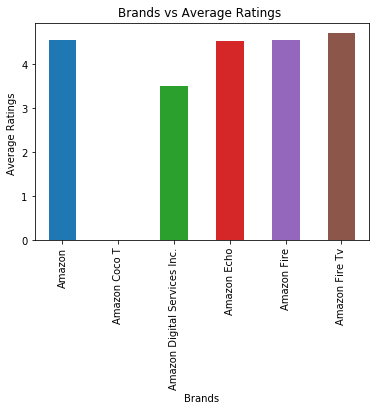

In [39]:

df1["reviews.rating"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Ratings ")
plt.title("Brands vs Average Ratings ")


Text(0.5, 1.0, 'Average Total Review vs Brands ')

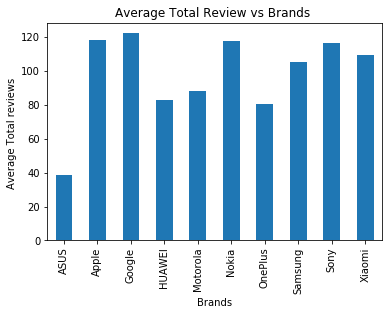

In [119]:
df1["totalReviews"].plot(kind='bar')
plt.xlabel("Brands")
plt.ylabel("Average Total reviews ")
plt.title("Average Total Review vs Brands ")